<a href="https://colab.research.google.com/github/Guuilherme67/Desafios-Lets_Code/blob/main/Gr%C3%A1fico_Pandas_Exerc%C3%ADcio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Aula 1: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos_novos:** Casos novos registrados na data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Grafico pandas lets code/Cópia de IBM_Employees.csv')

In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/Grafico pandas lets code/Cópia de dados_covid_sp_20.csv')

## Exercício 1:
Utilizando a base de dados da IBM:

**a)** Faça um gráfico de dispersão (scatter plot) com a variável *YearsAtCompany* no eixo X e a variável *DailyRate* no eixo Y. Coloque o título "YearsAtCompany x DailyRate" e determine o tamanho da imagem como (10,5).

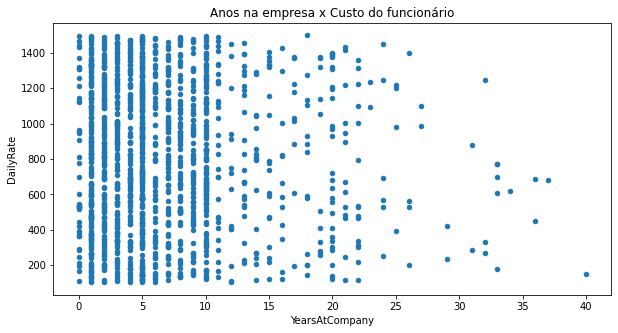

In [7]:
df1.plot.scatter(x='YearsAtCompany', y='DailyRate', figsize=(10,5), title='Anos na empresa x Custo do funcionário')

**b)** Repita o gráfico do item a, identificando as observações do gênero feminino com a cor vermelha e do gênero masculino com a cor verde. Não esqueça de inserir legenda para as cores.

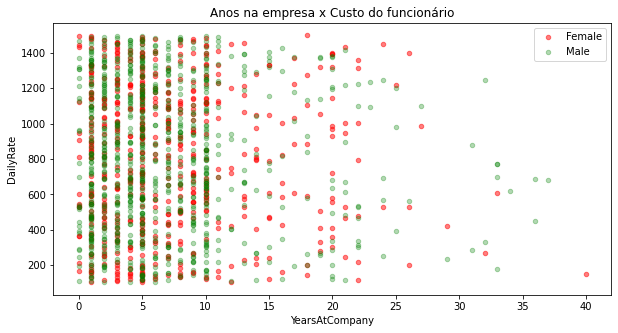

In [14]:
ax1 = df1[df1['Gender'] == 'Female'].plot.scatter(x='YearsAtCompany', y='DailyRate', figsize=(10,5), color='red',
                                       title='Anos na empresa x Custo do funcionário', label='Female', alpha=.5)
ax2 = df1[df1['Gender'] == 'Male'].plot.scatter(x='YearsAtCompany', y='DailyRate', figsize=(10,5), color='green', 
                                      ax=ax1, label='Male', alpha=.3)

**c)** Repita o gráfico do item a, porém agora identificando os funcionários pela variável 'JobSatisfaction', 
utilizando a seguinte escala de cores:
- cor: '#FFE4E1' para 'Low' 
- cor: '#FFB6C1' para 'Medium' 
- cor: '#FF69B4' para 'High' 
- cor: '#C71585' para 'Very High' 

In [15]:
df1.JobSatisfaction.value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [16]:
dict_js = {1: ['Low', '#FFE4E1'],
            2: ['Medium', '#FFB6C1'],
            3: ['High', '#FF69B4'],
            4: ['Very High', '#C71585']}

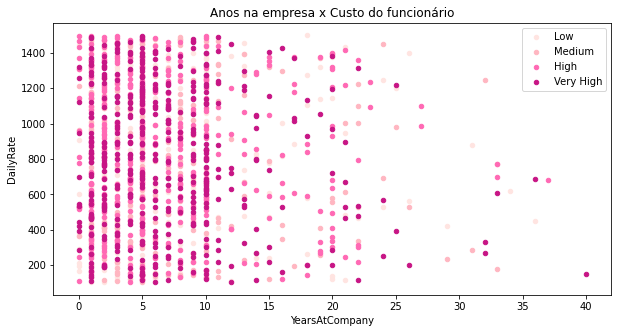

In [18]:
for i in dict_js:
    if i == 1:
        ax1 = df1[df1['JobSatisfaction'] == i].plot.scatter(x='YearsAtCompany', y='DailyRate', title='Anos na empresa x Custo do funcionário',
                                                              figsize=(10,5), color=dict_js[i][1], label=dict_js[i][0])
    else:
        ax2 = df1[df1['JobSatisfaction'] == i].plot.scatter(x='YearsAtCompany', y='DailyRate', figsize=(10,5), color=dict_js[i][1], label=dict_js[i][0], ax=ax1)

**d)** Observando os gráficos desenhados, você diria que o tempo na empresa, o gênero e/ou a satisfação no trabalho tem relação com o gasto diário com o colaborador?

In [19]:
print(''' Não da para tirar conclusões apenas com esses gráficos, 
aparetemente dodos os dados estão distribuido de maneira aleatória 
dando a entender que satisfação, gênero, e tempo na empresa
não tem qualquer influência no custo diário do colaborador''') 

 Não da para tirar conclusões apenas com esses gráficos, 
aparetemente dodos os dados estão distribuido de maneira aleatória 
dando a entender que satisfação, gênero, e tempo na empresa
não tem qualquer influência no custo diário do colaborador


## Exercício 2

**a)** Utilizando a base de dados de covid, crie um gráfico de linhas mostrando a evolução do número de casos novos mês a mês, para as DRS 'Grande São Paulo', 'São José do Rio Preto' e 'Marília'. Identifique os DRS por cores e legenda. Não esqueça de colocar título para o gráfico e para os eixos. 

Text(0, 0.5, 'Casos Novos')

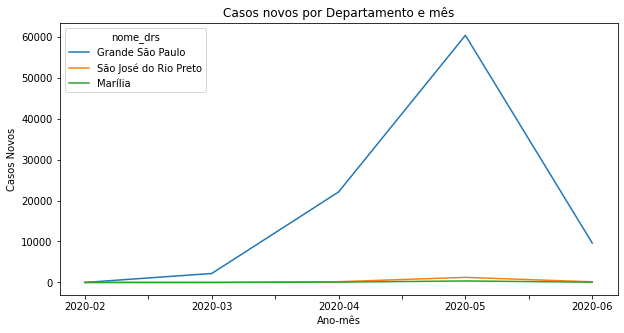

In [22]:
df_aux = df2.groupby(['nome_drs', 'ano_mes'], as_index=False).sum()
ax = df_aux.pivot(index='ano_mes', columns='nome_drs', 
             values='casos_novos')[['Grande São Paulo', 'São José do Rio Preto', 'Marília']].plot.line(figsize=(10,5),
                                                                                                 title='Casos novos por Departamento e mês')
ax.set_xlabel('Ano-mês')
ax.set_ylabel('Casos Novos')

**b)** Repita o gráfico do item a trocando as cores dos DRS.

Text(0, 0.5, 'Casos Novos')

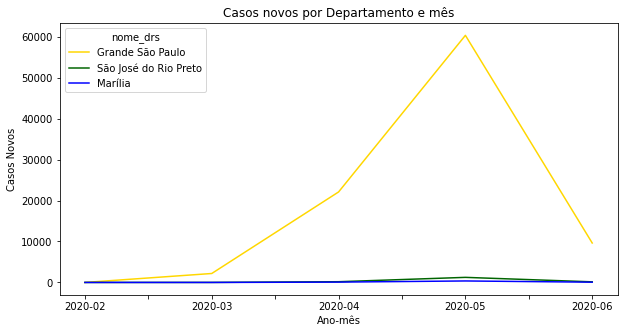

In [25]:
df_aux = df2.groupby(['nome_drs', 'ano_mes'], as_index=False).sum()
ax = df_aux.pivot(index='ano_mes', columns='nome_drs', 
             values='casos_novos')[['Grande São Paulo', 'São José do Rio Preto', 'Marília']].plot.line(figsize=(10,5),
                                                                                                 title='Casos novos por Departamento e mês',
                                                                                                 color={'Grande São Paulo' : 'Gold','São José do Rio Preto' : 'Darkgreen',
                                                                                                        'Marília': 'blue'})
ax.set_xlabel('Ano-mês')
ax.set_ylabel('Casos Novos')

**c)** Considerando apenas os DRS 'Bauru', 'São José do Rio Preto' e 'Marília', faça três gráficos de pizza, para os meses de abril, maio e junho, mostrando a porcentagem de novos óbitos em cada DRS.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ce1f050d0>,
      dtype=object)

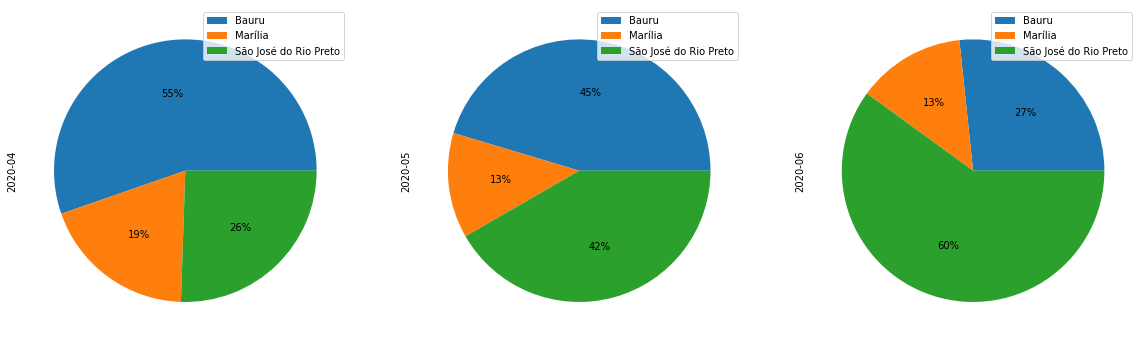

In [26]:
df_aux[df_aux['nome_drs'].isin(['Bauru', 'São José do Rio Preto', 
        'Marília']) &
      df_aux['ano_mes'].isin(['2020-04', '2020-05', '2020-06'])].pivot(index='nome_drs', columns='ano_mes', 
                                                                       values='obitos_novos').plot.pie(subplots=True, figsize=(20,10), 
                                                                      autopct='%1.0f%%', labeldistance=None)